In [64]:
# import required libraries and modules
import pandas as pd
import numpy as np
from datetime import date, timedelta
from random import random

In [73]:
# constants
STARTDATE = date(2008, 7, 11)
LEVEL = 100
TREND_P = 15/100
SEASONALITY_P = 25/100
VARIABILITY_P = 33/100

In [129]:
weeks, currentDate = 100, STARTDATE
trend, seasonability, variability, promotion, outOfStock, final = 0, 0, 0, 0, 0, 0 

cols = ['week', 'date', 'trend', 'seasonability', 'variability', 'baseline', 'promotion', 'out_of_stock', 'final']
df = pd.DataFrame(columns=cols)

# looping through weeks
for w in range(weeks):
    currentDate += timedelta(weeks=w)
    
    # some trend
    trend = (LEVEL/52) * TREND_P * w
    
    # SIN wave as seasonality
    seasonability = np.sin(np.pi * w / 26) * SEASONALITY_P * LEVEL
    
    # add random noise
    variability = (random() - random()) * VARIABILITY_P * LEVEL
    
    # sum if greater than 0, else 0 
    # sum will never be < 0 though
    baseline = 0 if LEVEL + trend + seasonability + variability < 0 else LEVEL + trend + seasonability + variability
    
    # 20% chance that there is a promotion
    promotion = (1 if random() <= 0.1 else 0) * random() * baseline
    
    # 20% chance of items out of stock
    outOfStock = (1 if random() <= 0.1 else 0) * random()**2 * baseline
    
    # final number as sum of all the above
    final = baseline + promotion - outOfStock
    
    df = df.append({
            'week': w, 
            'date': currentDate, 
            'trend': trend,
            'seasonability': seasonability, 
            'variability': variability, 
            'baseline': baseline, 
            'promotion': promotion, 
            'out_of_stock': outOfStock, 
            'final': final
        }, ignore_index=True)

In [130]:
df

,week,date,trend,seasonability,variability,baseline,promotion,out_of_stock,final
0,0,2008-07-11,0.000000,0.000000,-3.308456,96.691544,0.000000,3.825058,92.866486
1,1,2008-07-18,0.288462,3.013417,1.663624,104.965503,0.000000,0.000000,104.965503
2,2,2008-08-01,0.576923,5.982892,17.873088,124.432903,4.812511,0.000000,129.245414
3,3,2008-08-22,0.865385,8.865122,-21.397720,88.332787,0.000000,0.000000,88.332787
4,4,2008-09-19,1.153846,11.618079,12.330643,125.102569,0.000000,0.000000,125.102569
...,...,...,...,...,...,...,...,...,...
95,95,2095-12-02,27.403846,-22.136401,-12.916419,92.351026,65.994692,0.000000,158.345718
96,96,2097-10-04,27.692308,-20.574597,7.085146,114.202857,0.000000,0.000000,114.202857
97,97,2099-08-14,27.980769,-18.712769,-4.220906,105.047095,0.000000,0.000000,105.047095
98,98,2101-07-01,28.269231,-16.578066,-8.318035,103.373129,0.000000,0.000000,103.373129


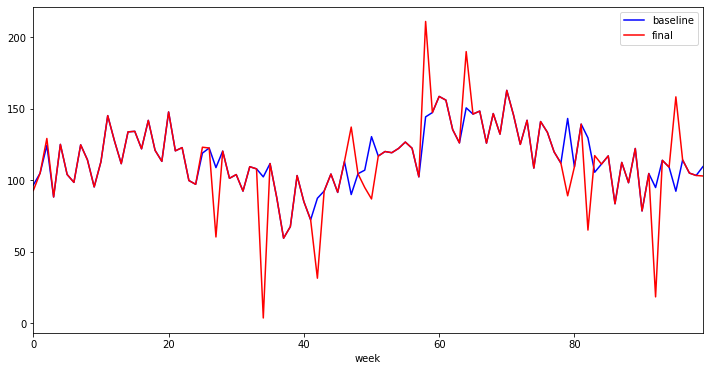

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = plt.gca()
df.plot(kind='line', x='week', y='baseline', color='blue', figsize=(12, 6), ax=ax)
df.plot(kind='line', x='week', y='final', color='red', figsize=(12, 6), ax=ax)
plt.show()